**Part (a) :**
**Stationarity Analysis of a White Noise Time Series Using Mean, Variance, and ACF**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42) 

N = 2000
mean = 0
variance = 1
std_dev = np.sqrt(variance)

time_index = np.arange(0, N)
Wt = np.random.normal(mean, std_dev, N)

Global Mean: 0.0450841465357407
Global Variance: 0.9765758247496166


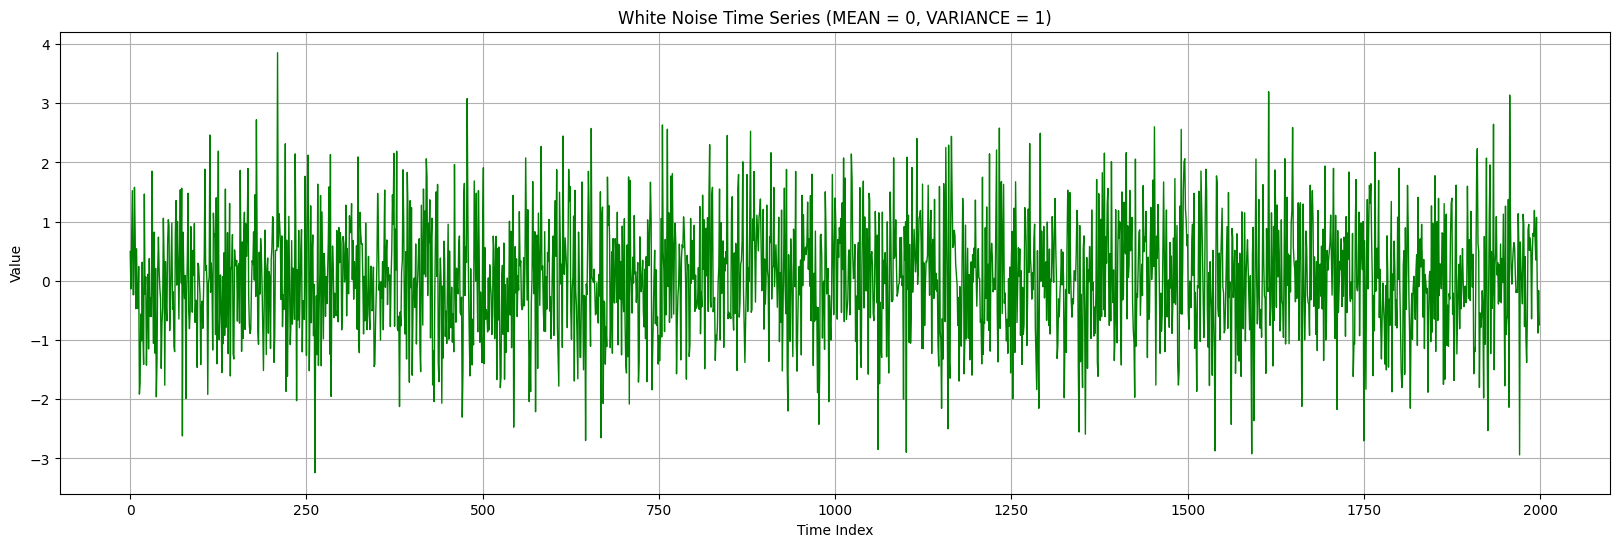

In [3]:
global_mean = np.mean(Wt)
global_variance = np.var(Wt)
print("Global Mean:", global_mean)
print("Global Variance:", global_variance)

plt.figure(figsize=(20, 6)) #,facecolor='yellow',edgecolor='red')
plt.plot(time_index, Wt, color='green', linewidth=1)
plt.title("White Noise Time Series (MEAN = 0, VARIANCE = 1)")
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

***Chunk-wise Analysis***

In [4]:
chunk_size = 100
num_chunks = N // chunk_size

chunk_means = []
chunk_variances = []
chunk_indices = []

for i in range(num_chunks):
    chunk = Wt[i * chunk_size:(i + 1) * chunk_size]
    chunk_means.append(np.mean(chunk))
    chunk_variances.append(np.var(chunk))
    chunk_indices.append(i + 1)

Global Mean: 0.0450841465357407


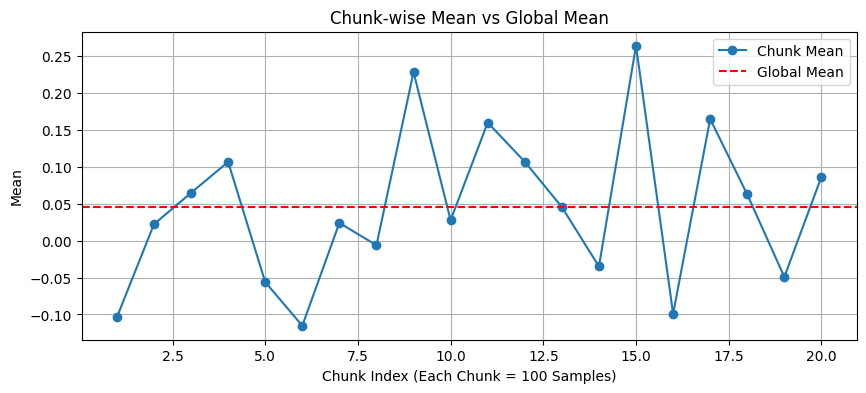

In [5]:
print("Global Mean:", global_mean)

# Mean Comparison Plot
plt.figure(figsize=(10, 4))
plt.plot(chunk_indices, chunk_means, marker='o', label='Chunk Mean')
plt.axhline(global_mean, color='red', linestyle='--', label='Global Mean')
plt.title("Chunk-wise Mean vs Global Mean")
plt.xlabel("Chunk Index (Each Chunk = 100 Samples)")
plt.ylabel("Mean")
plt.legend()
plt.grid(True)
plt.show()

Global Variance: 0.9765758247496166


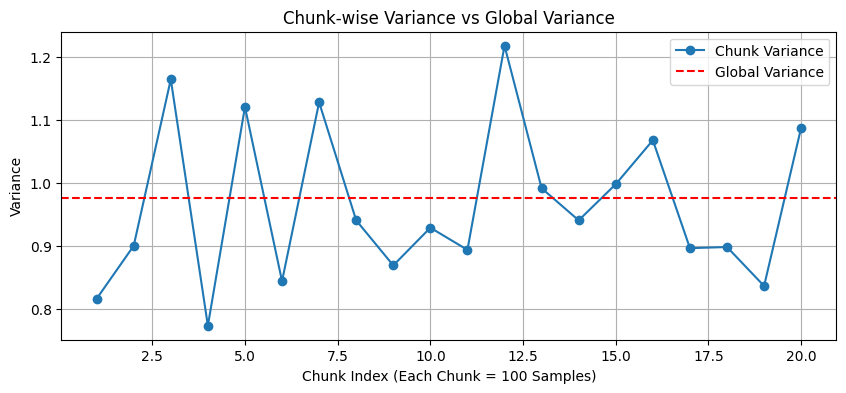

In [6]:
print("Global Variance:", global_variance)
# Variance Comparison Plot
plt.figure(figsize=(10, 4))
plt.plot(chunk_indices, chunk_variances, marker='o', label='Chunk Variance')
plt.axhline(global_variance, color='red', linestyle='--', label='Global Variance')
plt.title("Chunk-wise Variance vs Global Variance")
plt.xlabel("Chunk Index (Each Chunk = 100 Samples)")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)
plt.show()

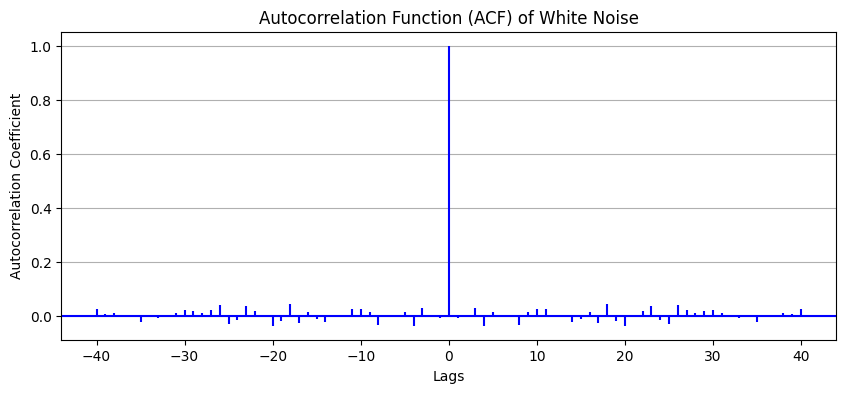

In [7]:
# ACF Plot
plt.figure(figsize=(10, 4))
plt.acorr(Wt, maxlags=40, linestyle='-', color='blue')
plt.title("Autocorrelation Function (ACF) of White Noise")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation Coefficient")
plt.grid(True, axis='y') 
plt.show()

#
#
#

**Part (b):**
**Moving Average Filtering of White Noise and Autocorrelation Analysis of the Filtered Time Series.**

In [8]:
M = int(input("Enter the value of M (M > 1): "))
print(f"Applying Moving Average Filter with M = {M}")

Applying Moving Average Filter with M = 5


In [9]:
# Number of valid output samples
L = N - (M - 1)

# Initialize output
Yt = np.zeros(L)

# Time indices using np.arange
t = np.arange(L)

# Moving Average computation using indexing
for k in range(M):
    Yt += Wt[t + k]

Yt = Yt / M

# Time index for filtered signal
time_index_Y = np.arange(L)

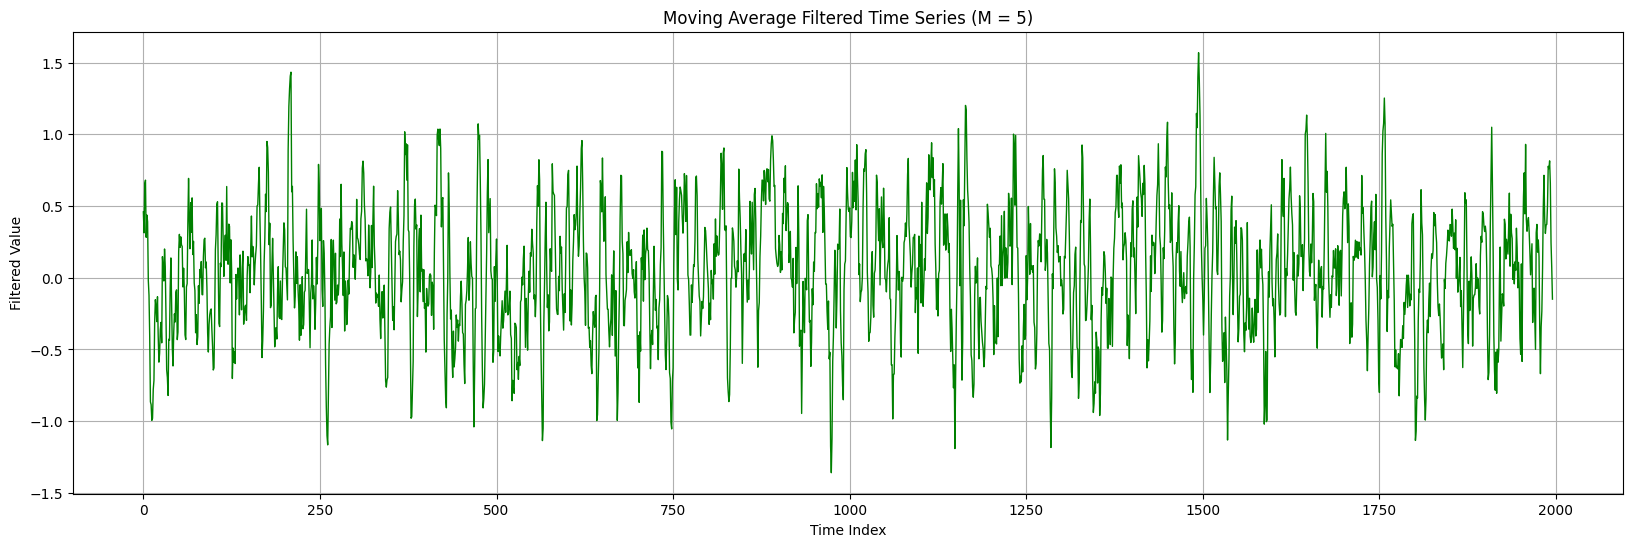

In [10]:
# Plot filtered time series
plt.figure(figsize=(20, 6))
plt.plot(time_index_Y, Yt, color='green', linewidth=1)
plt.title(f"Moving Average Filtered Time Series (M = {M})")
plt.xlabel("Time Index")
plt.ylabel("Filtered Value")
plt.grid(True)
plt.show()

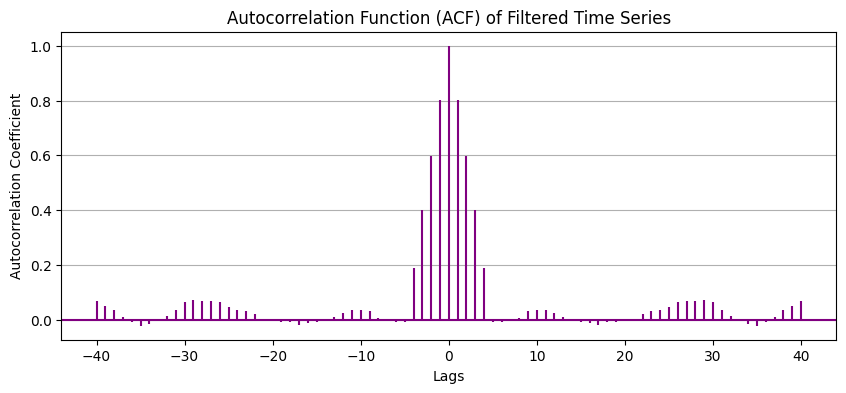

In [11]:
# ACF of filtered time series
plt.figure(figsize=(10, 4))
plt.acorr(Yt, maxlags=40, linestyle='-', color='purple')
plt.title("Autocorrelation Function (ACF) of Filtered Time Series")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation Coefficient")
plt.grid(True, axis='y')
plt.show()